<a href="https://colab.research.google.com/github/JeoungHojin/image_process/blob/main/canny_edge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

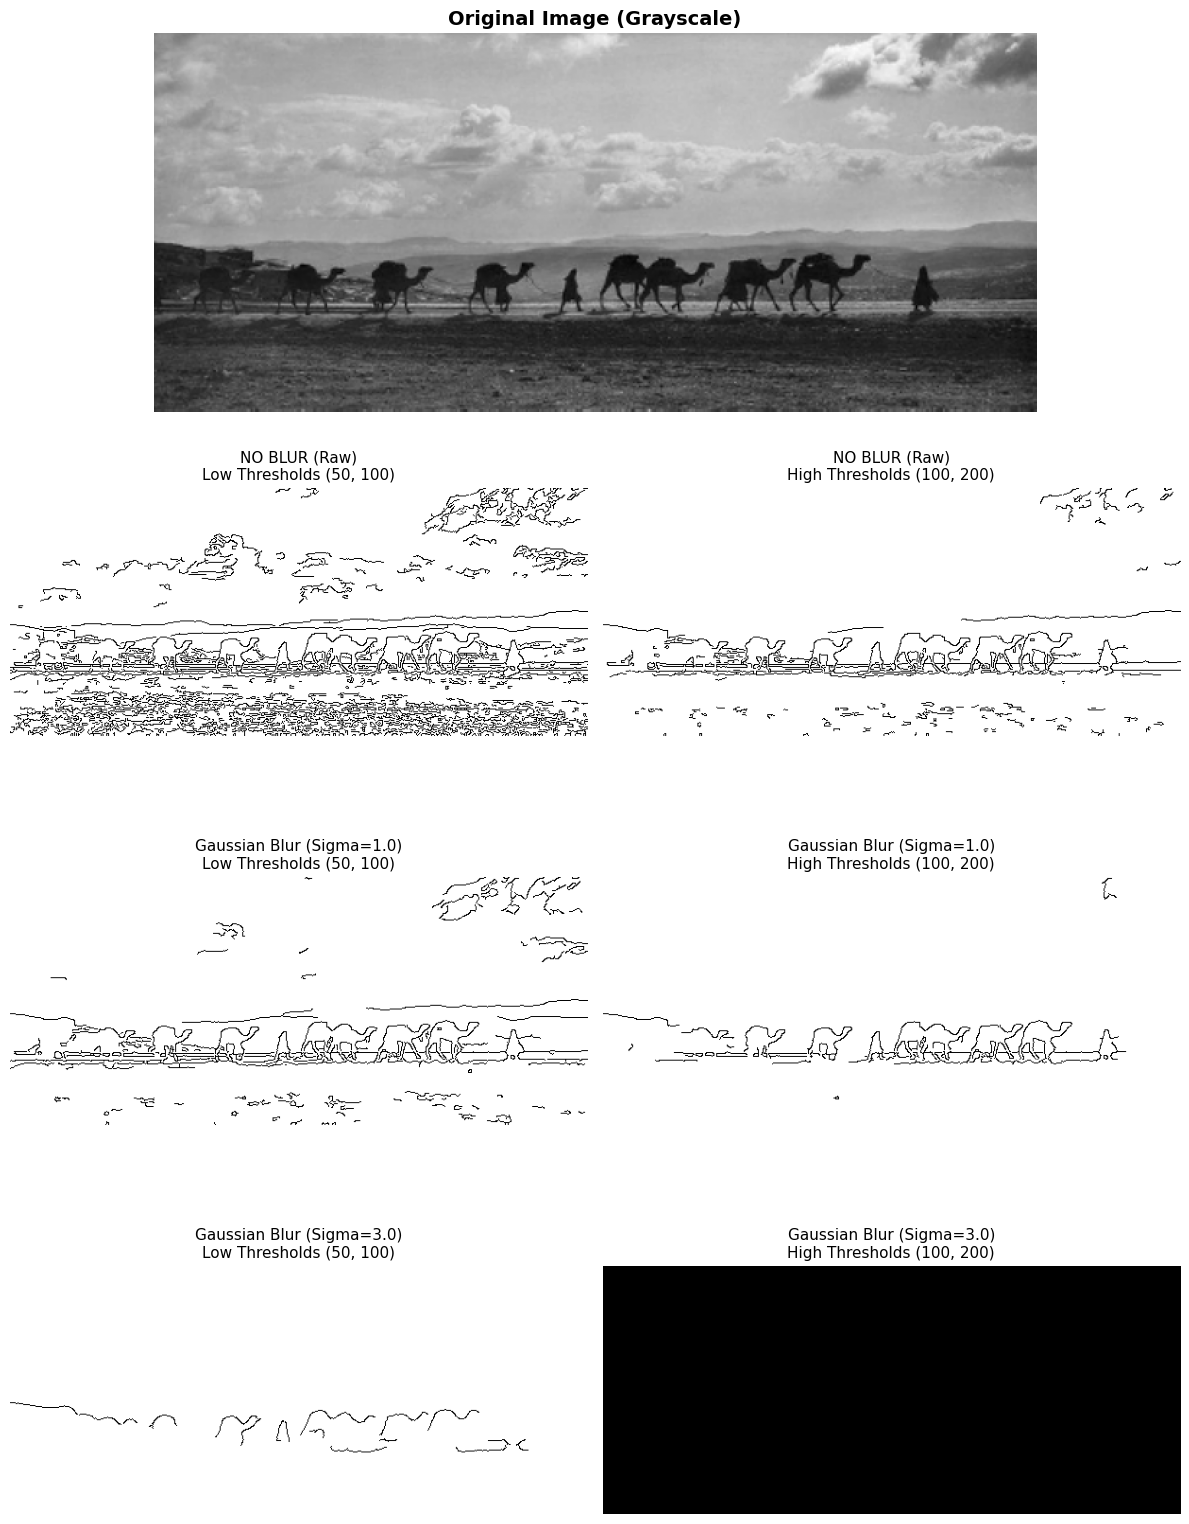

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def run_canny_visualization_only():
    img_path = '/content/drive/MyDrive/영상처리/camel.png'

    src = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if src is None:
        print(f"Error: 이미지를 찾을 수 없습니다. 경로를 확인해주세요: {img_path}")
        return

    # ---------------------------------------------------------
    # 2. 파라미터 설정
    # ---------------------------------------------------------
    sigmas = [0, 1.0, 3.0]
    thresh_low_case = (50, 100)
    thresh_high_case = (100, 200)

    # ---------------------------------------------------------
    # 3. 그래프 그리기
    # ---------------------------------------------------------
    fig = plt.figure(figsize=(12, 16))

    # (1) 원본 영상
    ax_main = plt.subplot2grid((4, 2), (0, 0), colspan=2)
    ax_main.imshow(src, cmap='gray')
    ax_main.set_title('Original Image (Grayscale)', fontsize=14, fontweight='bold')
    ax_main.axis('off')

    # (2) Sigma 변화에 따른 비교
    for i, sigma in enumerate(sigmas):
        row_idx = i + 1

        if sigma == 0:
            blurred = src
            title_prefix = "NO BLUR (Raw)"
        else:
            blurred = cv2.GaussianBlur(src, (0, 0), sigma)
            title_prefix = f"Gaussian Blur (Sigma={sigma})"

        # 왼쪽: 낮은 임계값 (반전 처리)
        edge_low = cv2.Canny(blurred, thresh_low_case[0], thresh_low_case[1])
        edge_low_inv = 255 - edge_low

        ax_left = plt.subplot2grid((4, 2), (row_idx, 0))
        ax_left.imshow(edge_low_inv, cmap='gray')
        ax_left.set_title(f'{title_prefix}\nLow Thresholds {thresh_low_case}', fontsize=11)
        ax_left.axis('off')

        # 오른쪽: 높은 임계값 (반전 처리)
        edge_high = cv2.Canny(blurred, thresh_high_case[0], thresh_high_case[1])
        edge_high_inv = 255 - edge_high

        ax_right = plt.subplot2grid((4, 2), (row_idx, 1))
        ax_right.imshow(edge_high_inv, cmap='gray')
        ax_right.set_title(f'{title_prefix}\nHigh Thresholds {thresh_high_case}', fontsize=11)
        ax_right.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    run_canny_visualization_only()